# Imports

In [1]:

import fastf1 as ff1
from fastf1 import plotting
from fastf1 import utils
from fastf1.core import Laps
plotting.setup_mpl()
ff1.Cache.enable_cache('../cache/')
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from plotly.subplots import make_subplots
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import requests
pio.templates.default = "plotly_dark"
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.display.max_rows = 75
pd.options.display.max_columns = 99

In [2]:
year = 2022
gp_round = 9
ses = 'FP1'

In [3]:
driver_1 = 'VER'
driver_2 = 'PER'

In [4]:
events_list = ff1.get_event_schedule(2022)[2:]
events_list_2021 = ff1.get_event_schedule(2021)[2:]
country_abbrev = ['BHR','SAU','AUS','ERO','MIA','ESP','MCO','AZE','CAN','GBR','AUT','FRA','HUN','BEL','NLD','ITA','SGP','JPN','USA','MXC','SAO','ABD']
events_list['CountryAbbreviation'] = country_abbrev

In [5]:
session = ff1.get_session(year, gp_round, ses)
session.load(weather=False, telemetry=True, messages=False)

core           INFO 	Loading data for Canadian Grand Prix - Practice 1 [v2.2.8]
api            INFO 	Using cached data for driver_info
core        WARNING 	Failed to load data from Ergast API! (This is expected for recent sessions)
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
core           INFO 	Finished loading data for 20 drivers: ['1', '55', '47', '44', '31', '24', '23', '22', '20', '18', '16', '14', '11', '10', '6', '5', '4', '3', '63', '77']


In [6]:
session.laps.pick_quicklaps()['Driver'].unique()

array(['VER', 'SAI', 'MSC', 'HAM', 'OCO', 'ZHO', 'ALB', 'TSU', 'MAG',
       'STR', 'LEC', 'ALO', 'PER', 'GAS', 'LAT', 'VET', 'NOR', 'RIC',
       'RUS', 'BOT'], dtype=object)

In [7]:
drivers = session.laps['Driver'].unique()
drivers

array(['VER', 'SAI', 'MSC', 'HAM', 'OCO', 'ZHO', 'ALB', 'TSU', 'MAG',
       'STR', 'LEC', 'ALO', 'PER', 'GAS', 'LAT', 'VET', 'NOR', 'RIC',
       'RUS', 'BOT'], dtype=object)

In [8]:
session.laps.pick_quicklaps()['Driver'].unique()

array(['VER', 'SAI', 'MSC', 'HAM', 'OCO', 'ZHO', 'ALB', 'TSU', 'MAG',
       'STR', 'LEC', 'ALO', 'PER', 'GAS', 'LAT', 'VET', 'NOR', 'RIC',
       'RUS', 'BOT'], dtype=object)

In [9]:
events_list

,RoundNumber,Country,Location,OfficialEventName,EventDate,EventName,EventFormat,Session1,Session1Date,Session2,Session2Date,Session3,Session3Date,Session4,Session4Date,Session5,Session5Date,F1ApiSupport,CountryAbbreviation
2,1,Bahrain,Sakhir,FORMULA 1 GULF AIR BAHRAIN GRAND PRIX 2022,2022-03-20 20:00:00,Bahrain Grand Prix,conventional,Practice 1,2022-03-18 15:00:00,Practice 2,2022-03-18 18:00:00,Practice 3,2022-03-19 15:00:00,Qualifying,2022-03-19 18:00:00,Race,2022-03-20 18:00:00,True,BHR
3,2,Saudi Arabia,Jeddah,FORMULA 1 STC SAUDI ARABIAN GRAND PRIX 2022,2022-03-27 22:00:00,Saudi Arabian Grand Prix,conventional,Practice 1,2022-03-25 17:00:00,Practice 2,2022-03-25 20:00:00,Practice 3,2022-03-26 17:00:00,Qualifying,2022-03-26 20:00:00,Race,2022-03-27 20:00:00,True,SAU
4,3,Australia,Melbourne,FORMULA 1 HEINEKEN AUSTRALIAN GRAND PRIX 2022,2022-04-10 17:00:00,Australian Grand Prix,conventional,Practice 1,2022-04-08 13:00:00,Practice 2,2022-04-08 16:00:00,Practice 3,2022-04-09 13:00:00,Qualifying,2022-04-09 16:00:00,Race,2022-04-10 15:00:00,True,AUS
5,4,Italy,Imola,FORMULA 1 ROLEX GRAN PREMIO DEL MADE IN ITALY E DELL'EMILIA-ROMAGNA 2022,2022-04-24 17:00:00,Emilia Romagna Grand Prix,sprint,Practice 1,2022-04-22 13:30:00,Qualifying,2022-04-22 17:00:00,Practice 2,2022-04-23 12:30:00,Sprint,2022-04-23 16:30:00,Race,2022-04-24 15:00:00,True,ERO
6,5,United States,Miami,FORMULA 1 CRYPTO.COM MIAMI GRAND PRIX 2022,2022-05-08 17:30:00,Miami Grand Prix,conventional,Practice 1,2022-05-06 14:30:00,Practice 2,2022-05-06 17:30:00,Practice 3,2022-05-07 13:00:00,Qualifying,2022-05-07 16:00:00,Race,2022-05-08 15:30:00,True,MIA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19,18,Japan,Suzuka,FORMULA 1 HONDA JAPANESE GRAND PRIX 2022,2022-10-09 16:00:00,Japanese Grand Prix,conventional,Practice 1,2022-10-07 13:00:00,Practice 2,2022-10-07 16:00:00,Practice 3,2022-10-08 13:00:00,Qualifying,2022-10-08 16:00:00,Race,2022-10-09 14:00:00,True,JPN
20,19,United States,Austin,FORMULA 1 ARAMCO UNITED STATES GRAND PRIX 2022,2022-10-23 16:00:00,United States Grand Prix,conventional,Practice 1,2022-10-21 14:00:00,Practice 2,2022-10-21 17:00:00,Practice 3,2022-10-22 14:00:00,Qualifying,2022-10-22 17:00:00,Race,2022-10-23 14:00:00,True,USA
21,20,Mexico,Mexico City,FORMULA 1 GRAN PREMIO DE LA CIUDAD DE MÉXICO 2022,2022-10-30 16:00:00,Mexico City Grand Prix,conventional,Practice 1,2022-10-28 13:00:00,Practice 2,2022-10-28 16:00:00,Practice 3,2022-10-29 12:00:00,Qualifying,2022-10-29 15:00:00,Race,2022-10-30 14:00:00,True,MXC
22,21,Brazil,São Paulo,FORMULA 1 HEINEKEN GRANDE PRÊMIO DE SÃO PAULO 2022,2022-11-13 17:00:00,São Paulo Grand Prix,sprint,Practice 1,2022-11-11 12:30:00,Qualifying,2022-11-11 16:00:00,Practice 2,2022-11-12 12:30:00,Sprint,2022-11-12 16:30:00,Race,2022-11-13 15:00:00,True,SAO


In [10]:
session_dict = {'conventional': ['Practice 1', 'Practice 2', 'Practice 3', 'Qualifying', 'Race'],
                'sprint': ['Practice 1', 'Qualifying', 'Practice 2', 'Sprint', 'Race']}

In [11]:
results = session.results
results

,DriverNumber,BroadcastName,Abbreviation,TeamName,TeamColor,FirstName,LastName,FullName,Position,GridPosition,Q1,Q2,Q3,Time,Status,Points
1,1,M VERSTAPPEN,VER,Red Bull Racing,1e5bc6,Max,Verstappen,Max Verstappen,0.0,0.0,NaT,NaT,NaT,NaT,,0.0
55,55,C SAINZ,SAI,Ferrari,ed1c24,Carlos,Sainz,Carlos Sainz,0.0,0.0,NaT,NaT,NaT,NaT,,0.0
47,47,M SCHUMACHER,MSC,Haas F1 Team,b6babd,Mick,Schumacher,Mick Schumacher,0.0,0.0,NaT,NaT,NaT,NaT,,0.0
44,44,L HAMILTON,HAM,Mercedes,6cd3bf,Lewis,Hamilton,Lewis Hamilton,0.0,0.0,NaT,NaT,NaT,NaT,,0.0
31,31,E OCON,OCO,Alpine,2293d1,Esteban,Ocon,Esteban Ocon,0.0,0.0,NaT,NaT,NaT,NaT,,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,5,S VETTEL,VET,Aston Martin,2d826d,Sebastian,Vettel,Sebastian Vettel,0.0,0.0,NaT,NaT,NaT,NaT,,0.0
4,4,L NORRIS,NOR,McLaren,f58020,Lando,Norris,Lando Norris,0.0,0.0,NaT,NaT,NaT,NaT,,0.0
3,3,D RICCIARDO,RIC,McLaren,f58020,Daniel,Ricciardo,Daniel Ricciardo,0.0,0.0,NaT,NaT,NaT,NaT,,0.0
63,63,G RUSSELL,RUS,Mercedes,6cd3bf,George,Russell,George Russell,0.0,0.0,NaT,NaT,NaT,NaT,,0.0


In [12]:
fastest_lap = session.laps.pick_fastest()
tel = fastest_lap.telemetry
tel

,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Distance,RelativeDistance,Status,X,Y,Z
2,2022-06-17 18:35:06.794,0 days 00:50:05.183000,,463.764444,0 days 00:00:00,10347,293,7,100,False,12,interpolation,0.056811,0.000013,OnTrack,3363,839,127
3,2022-06-17 18:35:06.951,0 days 00:50:05.340000,,463.764444,0 days 00:00:00.157000,10399,294,7,100,False,12,pos,13.002281,0.002997,OnTrack,3380,706,128
4,2022-06-17 18:35:07.042,0 days 00:50:05.431000,,463.764444,0 days 00:00:00.248000,10503,297,8,100,False,12,car,20.561389,0.004740,OnTrack,3385,643,127
5,2022-06-17 18:35:07.231,0 days 00:50:05.620000,,463.764444,0 days 00:00:00.437000,10619,299,8,100,False,12,pos,36.389627,0.008388,OnTrack,3392,524,128
6,2022-06-17 18:35:07.362,0 days 00:50:05.751000,22,463.764444,0 days 00:00:00.568000,10735,302,8,100,False,12,car,47.405833,0.010928,OnTrack,3394,419,127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,2022-06-17 18:36:21.330,0 days 00:51:19.719000,55,574.525741,0 days 00:01:14.536000,11453,287,7,100,False,12,pos,4280.411694,0.986680,OnTrack,3290,1261,129
556,2022-06-17 18:36:21.482,0 days 00:51:19.871000,55,572.562778,0 days 00:01:14.688000,11504,289,7,100,False,12,car,4292.665000,0.989504,OnTrack,3310,1165,129
557,2022-06-17 18:36:21.710,0 days 00:51:20.099000,55,570.062778,0 days 00:01:14.916000,11578,290,7,100,False,12,pos,4311.128718,0.993760,OnTrack,3326,1077,130
558,2022-06-17 18:36:21.842,0 days 00:51:20.231000,55,567.562778,0 days 00:01:15.048000,11653,292,7,100,False,12,car,4321.865000,0.996235,OnTrack,3341,985,131


In [13]:
# Function to format timedelta Series as string if necessary
def format_time(timedelta_series, num):
    t_list_str = []
    for i in timedelta_series:
        i = str(i)
        t_list_str.append(i[num:-3])
        
    return t_list_str

In [14]:
fastest_driver_1 = session.laps.pick_driver(driver_1).pick_fastest()
fastest_driver_2 = session.laps.pick_driver(driver_2).pick_fastest()

In [15]:
fastest_driver_1

Time                      0 days 00:51:20.341000
DriverNumber                                   1
LapTime                   0 days 00:01:15.158000
LapNumber                                     12
Stint                                          3
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:20.881000
Sector2Time               0 days 00:00:24.303000
Sector3Time               0 days 00:00:29.974000
Sector1SessionTime        0 days 00:50:26.064000
Sector2SessionTime        0 days 00:50:50.367000
Sector3SessionTime        0 days 00:51:20.341000
SpeedI1                                    253.0
SpeedI2                                    279.0
SpeedFL                                    290.0
SpeedST                                    324.0
IsPersonalBest                              True
Compound                                    SOFT
TyreLife                                     4.0
FreshTyre           

In [16]:
lap_1 = fastest_driver_1.telemetry

In [17]:
car_data_1 = fastest_driver_1.get_car_data().add_distance()
car_data_1['Distance'] = round(car_data_1['Distance'])
car_data_2 = fastest_driver_2.get_car_data().add_distance()
car_data_2['Distance'] = round(car_data_2['Distance'])

In [18]:
delta_time, ref_tel, compare_tel = utils.delta_time(fastest_driver_1, fastest_driver_2)
plot_title = f"{session.event.year} {session.event.EventName} - {session.name} - {driver_1} vs {driver_2}"

In [19]:
def plot_stacked_data():
    
    hovertemplate_speed = 'Speed: %{y} km/h'+'<br>Distance: %{x} meters'
    
    fig = make_subplots(specs=[[{"secondary_y": True}]])

    fig.add_trace(go.Scatter(x=car_data_1['Distance'], y=car_data_1['Speed'], name=driver_1, line_color=ff1.plotting.driver_color(driver_1), hovertemplate = hovertemplate_speed, opacity=0.8), secondary_y=False)
    fig.add_trace(go.Scatter(x=car_data_2['Distance'], y=car_data_2['Speed'], name=driver_2, line_color=ff1.plotting.driver_color(driver_2), hovertemplate = hovertemplate_speed, opacity=0.8), secondary_y=False)
    fig.add_trace(go.Scatter(x=ref_tel['Distance'], y=delta_time, line_color='white', name='Delta Time', hovertemplate = 'Delta Time: %{y:.3f} sec', opacity=0.8, line_width=1), secondary_y=True)

    fig.update_yaxes(title_text="Speed (km/h)", secondary_y=False)
    fig.update_yaxes(title_text=f"<-- {driver_2} ahead | {driver_1} ahead -->", secondary_y=True)
    fig.update_layout(width=1200, height=600, title_text=plot_title, xaxis_title='Distance (m)', title_x=0.5)
    
    return fig

plot_stacked_data()

In [20]:
def plot_unstacked_data():

    hovertemplate_speed = 'Speed: %{y} km/h'+'<br>Distance: %{x} meters'
    hovertemplate_gear = 'Gear: %{y}'+'<br>Distance: %{x} meters'
    
    fig = make_subplots(rows=3, cols=1, shared_xaxes=True, subplot_titles=('Speed', 'Gear', 'Delta Time'), vertical_spacing=0.1)

    fig.append_trace(go.Scatter(x=car_data_1['Distance'], y=car_data_1['Speed'], name=driver_1, line_color=ff1.plotting.driver_color(driver_1), hovertemplate = hovertemplate_speed, opacity=0.8), 1, 1)
    fig.append_trace(go.Scatter(x=car_data_2['Distance'], y=car_data_2['Speed'], name=driver_2, line_color=ff1.plotting.driver_color(driver_2), hovertemplate = hovertemplate_speed, opacity=0.8), 1, 1)

    fig.append_trace(go.Scatter(x=car_data_1['Distance'], y=car_data_1['nGear'], name=driver_1, line_color=ff1.plotting.driver_color(driver_1), hovertemplate = hovertemplate_gear, opacity=0.8, showlegend=False), 2, 1)
    fig.append_trace(go.Scatter(x=car_data_2['Distance'], y=car_data_2['nGear'], name=driver_2, line_color=ff1.plotting.driver_color(driver_2), hovertemplate = hovertemplate_gear, opacity=0.8, showlegend=False), 2, 1)

    fig.append_trace(go.Scatter(x=ref_tel['Distance'], y=delta_time, line_color='white', mode='lines', name='Delta Time', hovertemplate = 'Delta Time: %{y:.3f} sec', opacity=0.8), 3, 1)

    fig.update_yaxes(title_text="Speed (km/h)", row=1, col=1)
    fig.update_yaxes(title_text="Gear", row=2, col=1)
    fig.update_yaxes(title_text=f"<-- {driver_2} ahead | {driver_1} ahead -->", row=3, col=1)
    fig.update_xaxes(title_text="Distance (m)", row=3, col=1)

    fig.update_layout(width=1200, height=1200, title_text=plot_title, title_x=0.1)
    return fig

plot_unstacked_data()

In [21]:
# Returns only laps quicker than 107% of the quickest lap of the session, removing outlaps and inlaps.
session.laps.pick_quicklaps()

,Time,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,Sector2SessionTime,Sector3SessionTime,SpeedI1,SpeedI2,SpeedFL,SpeedST,IsPersonalBest,Compound,TyreLife,FreshTyre,LapStartTime,Team,Driver,TrackStatus,IsAccurate,LapStartDate
1,0 days 00:18:36.964000,1,0 days 00:01:17.991000,2,1,NaT,NaT,0 days 00:00:21.914000,0 days 00:00:25.032000,0 days 00:00:31.045000,0 days 00:17:40.887000,0 days 00:18:05.919000,0 days 00:18:36.964000,250.0,277.0,276.0,324.0,False,MEDIUM,2.0,True,0 days 00:17:18.973000,Red Bull Racing,VER,1,True,2022-06-17 18:02:20.584
3,0 days 00:21:31.634000,1,0 days 00:01:16.507000,4,1,NaT,NaT,0 days 00:00:21.618000,0 days 00:00:24.548000,0 days 00:00:30.341000,0 days 00:20:36.745000,0 days 00:21:01.293000,0 days 00:21:31.634000,253.0,279.0,289.0,324.0,False,MEDIUM,4.0,True,0 days 00:20:15.127000,Red Bull Racing,VER,1,True,2022-06-17 18:05:16.738
5,0 days 00:24:27.341000,1,0 days 00:01:15.799000,6,1,NaT,NaT,0 days 00:00:21.244000,0 days 00:00:24.431000,0 days 00:00:30.124000,0 days 00:23:32.786000,0 days 00:23:57.217000,0 days 00:24:27.341000,254.0,280.0,290.0,326.0,False,MEDIUM,6.0,True,0 days 00:23:11.542000,Red Bull Racing,VER,1,True,2022-06-17 18:08:13.153
7,0 days 00:27:40.097000,1,0 days 00:01:15.703000,8,1,NaT,NaT,0 days 00:00:21.186000,0 days 00:00:24.329000,0 days 00:00:30.188000,0 days 00:26:45.580000,0 days 00:27:09.909000,0 days 00:27:40.097000,255.0,280.0,291.0,326.0,False,MEDIUM,8.0,True,0 days 00:26:24.394000,Red Bull Racing,VER,1,True,2022-06-17 18:11:26.005
11,0 days 00:51:20.341000,1,0 days 00:01:15.158000,12,3,NaT,NaT,0 days 00:00:20.881000,0 days 00:00:24.303000,0 days 00:00:29.974000,0 days 00:50:26.064000,0 days 00:50:50.367000,0 days 00:51:20.341000,253.0,279.0,290.0,324.0,True,SOFT,4.0,False,0 days 00:50:05.183000,Red Bull Racing,VER,1,True,2022-06-17 18:35:06.794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565,0 days 00:27:13.299000,77,0 days 00:01:18.581000,9,1,NaT,NaT,0 days 00:00:22.107000,0 days 00:00:25.373000,0 days 00:00:31.101000,0 days 00:26:16.825000,0 days 00:26:42.198000,0 days 00:27:13.299000,243.0,268.0,282.0,312.0,False,MEDIUM,9.0,True,0 days 00:25:54.718000,Alfa Romeo,BOT,1,True,2022-06-17 18:10:56.329
569,0 days 00:41:46.212000,77,0 days 00:01:16.754000,13,3,NaT,NaT,0 days 00:00:21.164000,0 days 00:00:24.710000,0 days 00:00:30.880000,0 days 00:40:50.622000,0 days 00:41:15.332000,0 days 00:41:46.212000,249.0,274.0,273.0,307.0,False,SOFT,3.0,True,0 days 00:40:29.458000,Alfa Romeo,BOT,1,True,2022-06-17 18:25:31.069
571,0 days 00:44:39.482000,77,0 days 00:01:16.738000,15,3,NaT,NaT,0 days 00:00:21.282000,0 days 00:00:24.647000,0 days 00:00:30.809000,0 days 00:43:44.026000,0 days 00:44:08.673000,0 days 00:44:39.482000,248.0,271.0,276.0,311.0,False,SOFT,5.0,True,0 days 00:43:22.744000,Alfa Romeo,BOT,1,True,2022-06-17 18:28:24.355
574,0 days 00:49:02.973000,77,0 days 00:01:16.429000,18,3,NaT,NaT,0 days 00:00:21.253000,0 days 00:00:24.538000,0 days 00:00:30.638000,0 days 00:48:07.797000,0 days 00:48:32.335000,0 days 00:49:02.973000,250.0,273.0,279.0,314.0,False,SOFT,8.0,True,0 days 00:47:46.544000,Alfa Romeo,BOT,1,True,2022-06-17 18:32:48.155


In [22]:
lap_1 = fastest_driver_1.telemetry
lap_2 = fastest_driver_2.telemetry
lap_1 = lap_1[lap_1['Source'] != 'pos'].reset_index(drop=True)
lap_2 = lap_2[lap_2['Source'] != 'pos'].reset_index(drop=True)

In [23]:
start_line_dict = {1: [120, 1280, '^'],
                   2: [-1341, 2800, '<'],
                   3: [-1228, 100, '<'],
                   4: [-1533, -650, '<'],
                   5: [2633, 128, '>'],
                   6: [25, -469, '<'],
                   7: [-8065, -6549, '^'],
                   8: [700, 350, '>'],
                   9: [3700, 800, 'v'],
}

for i in range(1,23):
    if i in start_line_dict:
        continue
    else:
        start_line_dict[i] = [0, 0, '<']

In [24]:
def get_start_line_data():
    '''
    Returns a dict with the start line postitions
    '''
    start_line_dict_temp = requests.get('https://f1-jedha-bucket.s3.eu-west-3.amazonaws.com/data/start_line_dict.json').json()
    return {int(k): v for k, v in start_line_dict_temp.items()} 

In [25]:
colormap_speed = mpl.cm.RdYlGn
colormap_gear = mpl.cm.get_cmap('RdYlGn', 8)
points = np.array([lap_1['X'], lap_1['Y']]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
start_x = points[0][0][0]
start_y = points[0][0][1]
direction_x = start_line_dict[gp_round][0]
direction_y = start_line_dict[gp_round][1]
direction_marker = start_line_dict[gp_round][2]
pix = 1/plt.rcParams['figure.dpi']

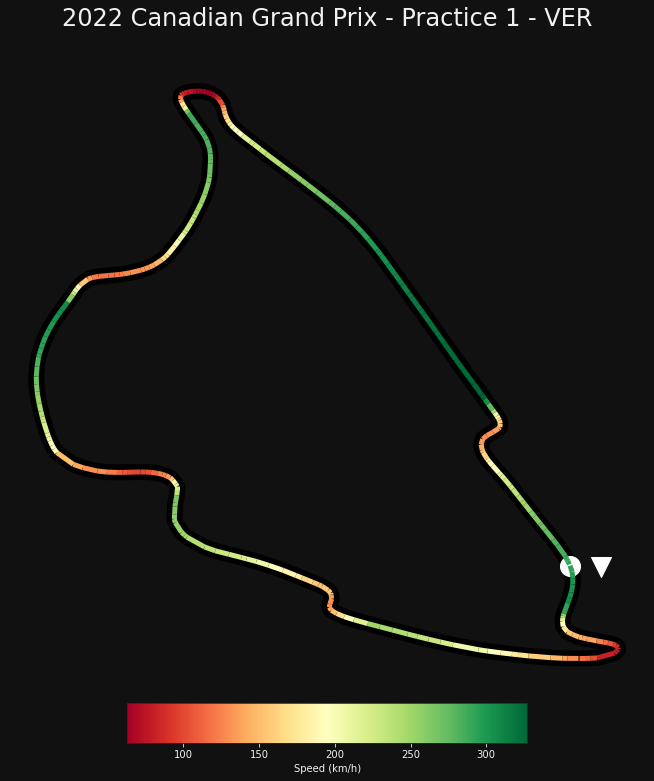

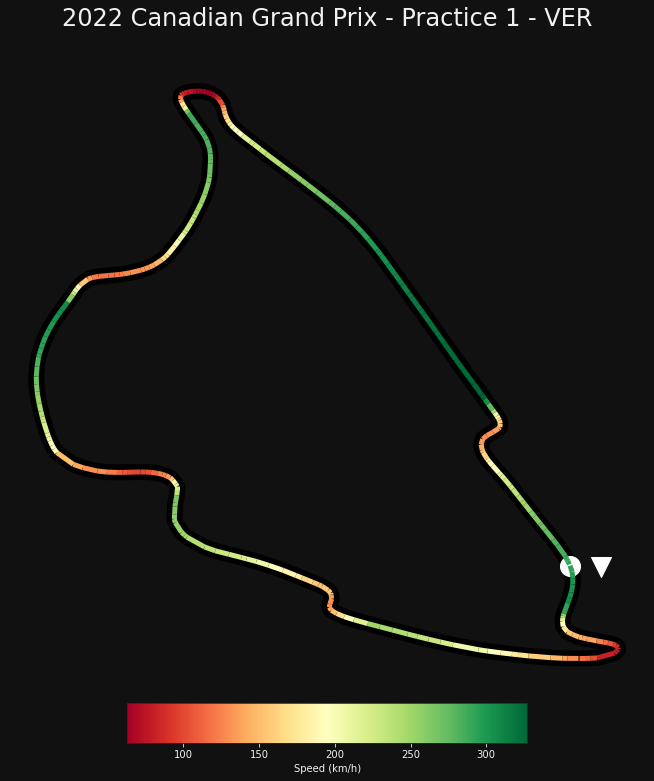

In [26]:
def plot_track_speed():

    # Setup plot
    fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(800*pix, 800*pix))
    fig.suptitle(f"{session.event.year} {session.event.EventName} - {session.name} - {driver_1}", size=24, y=0.97)

    # Adjust margins and turn of axis
    plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
    ax.axis('off')

    # After this, we plot the data itself.
    # Create background track line
    ax.plot(lap_1['X'], lap_1['Y'], color='black', linestyle='-', linewidth=16, zorder=1)

    # Add start line marker
    plt.scatter(start_x, start_y, color='white', s=400, zorder=1)
    plt.scatter(direction_x, direction_y, color='white', s=400, zorder=1, marker=direction_marker)

    # Create a continuous norm to map from data points to colors
    norm = plt.Normalize(lap_1['Speed'].min(), lap_1['Speed'].max())
    lc = LineCollection(segments, cmap=colormap_speed, norm=norm, linestyle='-', linewidth=5)

    # Set the values used for colormapping
    lc.set_array(lap_1['Speed'])

    # Merge all line segments together
    line = ax.add_collection(lc)

    # Finally, we create a color bar as a legend.
    cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
    normlegend = mpl.colors.Normalize(vmin=lap_1['Speed'].min(), vmax=lap_1['Speed'].max())
    legend = mpl.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=colormap_speed, orientation="horizontal", label='Speed (km/h)')

    # Set background color to transparent
    # fig.patch.set_alpha(0)
    fig.patch.set_facecolor('#111111')

    # Show the plot
    return fig

plot_track_speed()

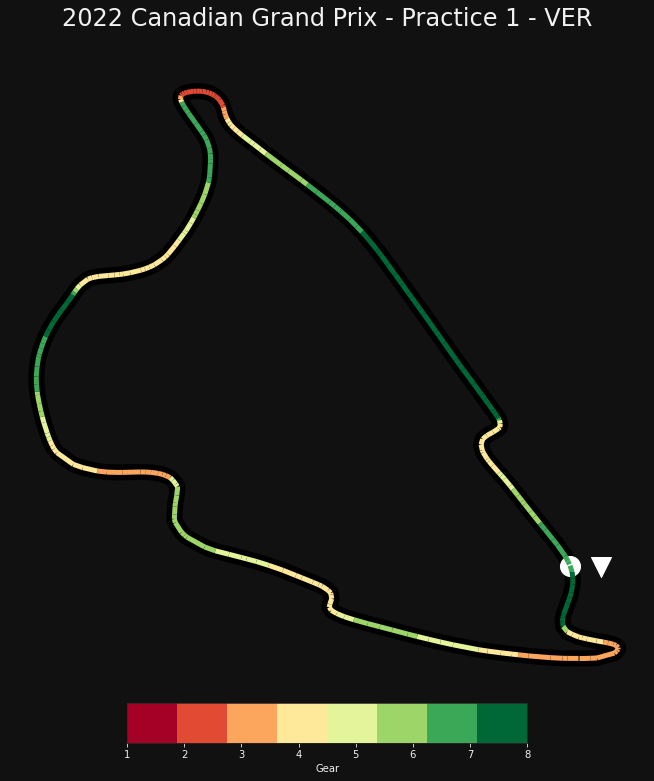

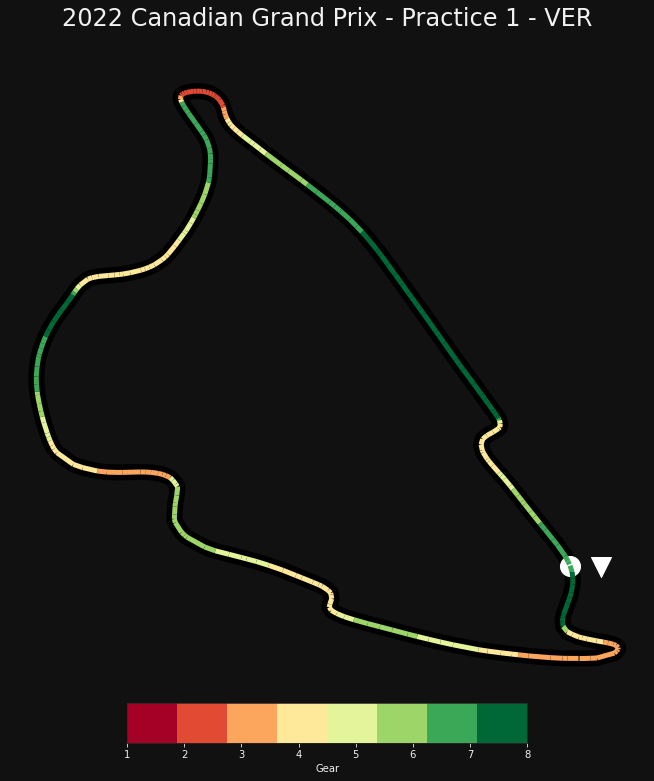

In [27]:
def plot_track_gear():

    # Setup plot
    fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(800*pix, 800*pix))
    fig.suptitle(f"{session.event.year} {session.event.EventName} - {session.name} - {driver_1}", size=24, y=0.97)

    # Adjust margins and turn of axis
    plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
    ax.axis('off')

    # After this, we plot the data itself.
    # Create background track line
    ax.plot(lap_1['X'], lap_1['Y'], color='black', linestyle='-', linewidth=16, zorder=1)

    # Add start line marker
    plt.scatter(start_x, start_y, color='white', s=400, zorder=1)
    plt.scatter(direction_x, direction_y, color='white', s=400, zorder=1, marker=direction_marker)

    # Create a norm to map from data points to colors
    norm = plt.Normalize(1, colormap_gear.N+1)
    lc = LineCollection(segments, cmap=colormap_gear, norm=norm, linestyle='-', linewidth=5)

    # Set the values used for colormapping
    lc.set_array(lap_1['nGear'].to_numpy().astype(float))

    # Merge all line segments together
    line = ax.add_collection(lc)

    # Create a color bar as a legend
    cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
    normlegend = mpl.colors.Normalize(vmin=1, vmax=8)
    legend = mpl.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=colormap_gear, orientation="horizontal", label='Gear')

    # Set background color to transparent
    # fig.patch.set_alpha(0)
    fig.patch.set_facecolor('#111111')

    # Show the plot
    return fig

plot_track_gear()

In [28]:
def delta_bounds(vmin, vmax):
    if abs(vmin) < abs(vmax):
        vmin = -(vmax)
    else:
        vmax = -(vmin)
    return vmin, vmax

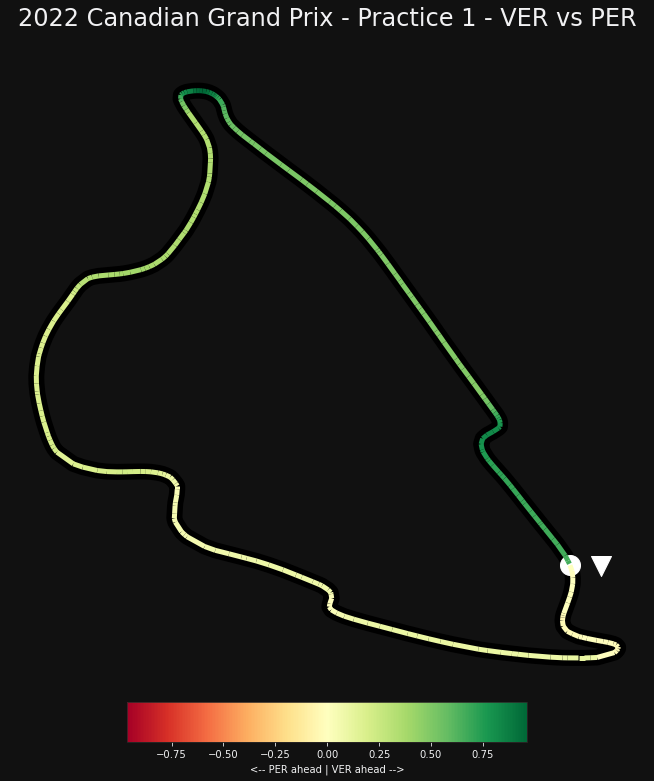

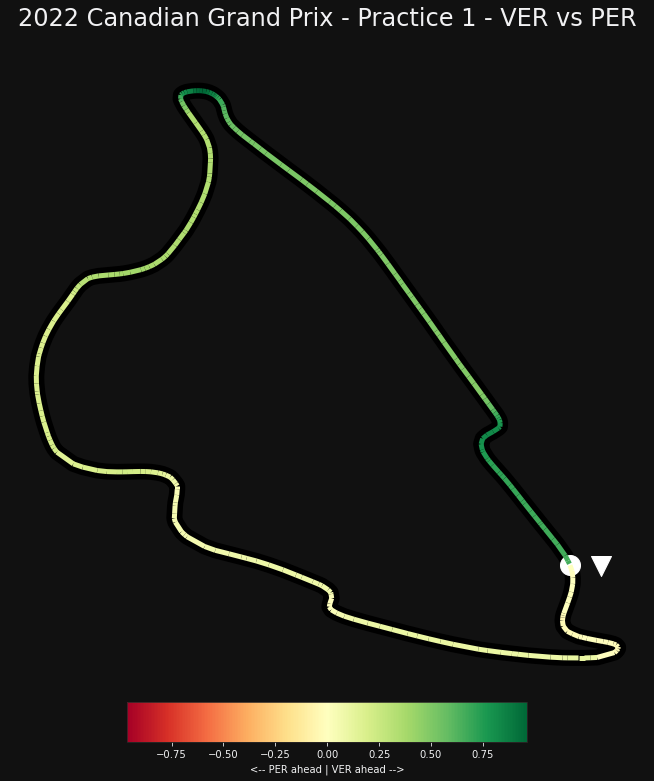

In [29]:
def plot_track_delta():

    # Determine boundaries for the colorbar
    vmin, vmax = delta_bounds(delta_time.min(), delta_time.max())

    # Setup plot
    fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(800*pix, 800*pix))
    fig.suptitle(f"{session.event.year} {session.event.EventName} - {session.name} - {driver_1} vs {driver_2}", size=24, y=0.97)

    # Adjust margins and turn of axis
    plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
    ax.axis('off')

    # After this, we plot the data itself.
    # Create background track line
    ax.plot(lap_1['X'], lap_1['Y'], color='black', linestyle='-', linewidth=16, zorder=1)

    # Add start line marker
    plt.scatter(start_x, start_y, color='white', s=400, zorder=1)
    plt.scatter(direction_x, direction_y, color='white', s=400, zorder=1, marker=direction_marker)

    # Create a continuous norm to map from data points to colors
    norm = plt.Normalize(vmin, vmax)
    lc = LineCollection(segments, cmap=colormap_speed, norm=norm, linestyle='-', linewidth=5)

    # Set the values used for colormapping
    lc.set_array(delta_time)

    # Merge all line segments together
    line = ax.add_collection(lc)

    # Finally, we create a color bar as a legend.
    cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
    normlegend = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
    legend = mpl.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=colormap_speed, orientation="horizontal", label=f"<-- {driver_2} ahead | {driver_1} ahead -->")

    # Set background color to transparent
    # fig.patch.set_alpha(0)
    fig.patch.set_facecolor('#111111')

    # Show the plot
    return fig

plot_track_delta()

In [30]:
race = session.laps
race = race.sort_values('Time').reset_index(drop=True)

# Tests

In [31]:
# Ergast API base request
def ergast_retrieve(api_endpoint: str):
    url = f'https://ergast.com/api/f1/{api_endpoint}.json'
    response = requests.get(url).json()
    
    return response['MRData']

In [32]:
# Get drivers standings
def update_driver_standings(rounds):
    standings_dict = {}
    for i in range(1, rounds+1):
        try:
            r = ergast_retrieve(f'current/{i}/driverStandings')
            standings = r['StandingsTable']['StandingsLists'][0]['DriverStandings']
            for j in standings:
                if j['Driver']['code'] not in standings_dict:
                    if i > 1:
                        num = i - 1
                        standings_dict[j['Driver']['code']] = [0] * num
                        standings_dict[j['Driver']['code']].append(j['points'])
                    else:
                        standings_dict[j['Driver']['code']] = [j['points']]
                else:
                    if len(standings_dict[j['Driver']['code']]) < (i - 1):
                        num_missing = (i + 1) - len(standings_dict[j['Driver']['code']])
                        print(num_missing)
                        standings_dict[j['Driver']['code']] = standings_dict[j['Driver']['code']] + [0] * num_missing
                        standings_dict[j['Driver']['code']].append(j['points'])
                    else:
                        standings_dict[j['Driver']['code']].append(j['points'])
        except IndexError:
            break
    
    df_drivers = pd.DataFrame.from_dict(standings_dict, orient='index')
    df_drivers.columns = df_drivers.columns + 1
    df_drivers[df_drivers.columns] = df_drivers[df_drivers.columns].apply(pd.to_numeric)
    df_drivers.sort_values(by=df_drivers.columns[-1], ascending=False, inplace=True)
    return df_drivers

df_drivers = update_driver_standings(22)
df_drivers.to_csv('../data/drivers_standings.csv')

In [33]:
# Get constructors standings
def update_constructor_standings(rounds):
    standings_dict = {}
    for i in range(1, rounds+1):
        try:
            r = ergast_retrieve(f'current/{i}/constructorStandings')
            standings = r['StandingsTable']['StandingsLists'][0]['ConstructorStandings']
            for i in standings:
                if i['Constructor']['name'] not in standings_dict:
                    standings_dict[i['Constructor']['name']] = [i['points']]
                else:
                    standings_dict[i['Constructor']['name']].append(i['points'])
        except IndexError:
            break
        
    df_constructors = pd.DataFrame.from_dict(standings_dict, orient='index')
    df_constructors.columns = df_constructors.columns + 1
    df_constructors[df_constructors.columns] = df_constructors[df_constructors.columns].apply(pd.to_numeric)
    df_constructors.sort_values(by=df_constructors.columns[-1], ascending=False, inplace=True)
    return df_constructors

df_constructors = update_constructor_standings(22)
df_constructors.to_csv('../data/constructors_standings.csv')

In [34]:
df_drivers_standings = pd.read_csv('../data/drivers_standings.csv', index_col=0)
df_drivers_standings

,1,2,3,4,5,6,7,8
VER,0,25,25,59,85,110,125,150
PER,0,12,30,54,66,85,110,129
LEC,26,45,71,86,104,104,116,116
RUS,12,22,37,49,59,74,84,99
SAI,18,33,33,38,53,65,83,83
...,...,...,...,...,...,...,...,...
STR,0,0,0,1,2,2,2,2
ZHO,1,1,1,1,1,1,1,1
LAT,0,0,0,0,0,0,0,0
HUL,0,0,0,0,0,0,0,0


In [35]:
def get_round_mapping():
    '''
    Returns a round to event name mapping dictionary
    '''
    round_mapping = {}
    for i in events_list.itertuples():
        round_mapping[str(i.RoundNumber)] = i.CountryAbbreviation
    return round_mapping

In [36]:
df_colors = pd.read_csv('../data/drivers_info.csv', index_col=0)

def plot_compare_points():
    
    round_mapping = get_round_mapping() 
    df_drivers = pd.read_csv('../data/drivers_standings.csv', index_col=0)
    df_colors = pd.read_csv('../data/drivers_info.csv', index_col=0)

    df_drivers_line = df_drivers[(df_drivers.index == driver_1) | (df_drivers.index == driver_2)].transpose().reset_index().rename(columns={'index': 'Round'})
    df_drivers_line['country'] = df_drivers_line['Round'].map(round_mapping)
    df_drivers_line

    driver_1_team_color = '#' + df_colors[df_colors['Abbreviation'] == driver_1].values[0][4]
    driver_2_team_color = '#' + df_colors[df_colors['Abbreviation'] == driver_2].values[0][4]
    hovertemplate = 'Points: %{y}'

    fig = go.Figure()

    fig.add_trace(go.Scatter(x=df_drivers_line['country'], y=df_drivers_line[driver_1], name=driver_1, line_color=driver_1_team_color, hovertemplate=hovertemplate))
    fig.add_trace(go.Scatter(x=df_drivers_line['country'], y=df_drivers_line[driver_2], name=driver_2, line_color=driver_2_team_color, hovertemplate=hovertemplate))

    fig.update_xaxes(tickangle=45)
    fig.update_layout(width= 800, height = 600, title_text=f"Current Standings - {driver_1} vs {driver_2}", yaxis_title="Points", title_x=0.5)
    return fig

In [37]:
plot_compare_points()

In [38]:
df_constructors_standings = pd.read_csv('../data/constructors_standings.csv', index_col=0)
df_constructors_standings

,1,2,3,4,5,6,7,8
Red Bull,0,37,55,113,151,195,235,279
Ferrari,44,78,104,124,157,169,199,199
Mercedes,27,38,65,77,95,120,134,161
McLaren,0,6,24,46,46,50,59,65
Alpine F1 Team,8,16,22,22,26,34,40,47
Alfa Romeo,9,9,13,25,31,39,41,41
AlphaTauri,4,8,10,16,16,17,17,27
Haas F1 Team,10,12,12,15,15,15,15,15
Aston Martin,0,0,0,5,6,6,7,15
Williams,0,0,1,1,3,3,3,3


In [39]:
df_drivers_standings_test = pd.read_csv('../data/drivers_standings.csv', index_col=0)
df_drivers_standings

,1,2,3,4,5,6,7,8
VER,0,25,25,59,85,110,125,150
PER,0,12,30,54,66,85,110,129
LEC,26,45,71,86,104,104,116,116
RUS,12,22,37,49,59,74,84,99
SAI,18,33,33,38,53,65,83,83
...,...,...,...,...,...,...,...,...
STR,0,0,0,1,2,2,2,2
ZHO,1,1,1,1,1,1,1,1
LAT,0,0,0,0,0,0,0,0
HUL,0,0,0,0,0,0,0,0


In [40]:
def get_drivers_standings_df():
    
    df = pd.read_csv('https://f1-jedha-bucket.s3.eu-west-3.amazonaws.com/data/constructors_standings.csv', index_col=0)
    round_mapping = {}
    for i in events_list.itertuples():
        round_mapping[str(i.RoundNumber)] = i.CountryAbbreviation
        
    df.columns = df.columns.map(round_mapping)
    return df

def get_constructors_standings_df():
    
    df = pd.read_csv('https://f1-jedha-bucket.s3.eu-west-3.amazonaws.com/data/constructors_standings.csv', index_col=0)
    round_mapping = {}
    for i in events_list.itertuples():
        round_mapping[str(i.RoundNumber)] = i.CountryAbbreviation
        
    df.columns = df.columns.map(round_mapping)
    return df

In [41]:
get_drivers_standings_df()

,BHR,SAU,AUS,ERO,MIA,ESP,MCO,AZE
Red Bull,0,37,55,113,151,195,235,279
Ferrari,44,78,104,124,157,169,199,199
Mercedes,27,38,65,77,95,120,134,161
McLaren,0,6,24,46,46,50,59,65
Alpine F1 Team,8,16,22,22,26,34,40,47
Alfa Romeo,9,9,13,25,31,39,41,41
AlphaTauri,4,8,10,16,16,17,17,27
Haas F1 Team,10,12,12,15,15,15,15,15
Aston Martin,0,0,0,5,6,6,7,15
Williams,0,0,1,1,3,3,3,3


In [42]:
get_constructors_standings_df()

,BHR,SAU,AUS,ERO,MIA,ESP,MCO,AZE
Red Bull,0,37,55,113,151,195,235,279
Ferrari,44,78,104,124,157,169,199,199
Mercedes,27,38,65,77,95,120,134,161
McLaren,0,6,24,46,46,50,59,65
Alpine F1 Team,8,16,22,22,26,34,40,47
Alfa Romeo,9,9,13,25,31,39,41,41
AlphaTauri,4,8,10,16,16,17,17,27
Haas F1 Team,10,12,12,15,15,15,15,15
Aston Martin,0,0,0,5,6,6,7,15
Williams,0,0,1,1,3,3,3,3


In [43]:
def format_results_race(session_type):
    '''
    Returns a formatted session results dataframe
    '''    
    results = session.results    
    if session_type == 'Race' or session_type == 'Sprint':
        # Get the results table, convert it to a dataframe and set the numeric columns to int        
        results_formatted = pd.DataFrame(results[['FullName','TeamName','Position','GridPosition','Time','Status','Points']].copy())
        results_formatted[['Points', 'Position', 'GridPosition']] = results_formatted[['Points', 'Position', 'GridPosition']].astype(int)
        results_formatted = results_formatted.rename(columns = {'FullName': 'Name'})
        
        # Compute time difference at finish
        time_difference = []
        time_1 = results_formatted['Time'][0]
        for i in results_formatted.itertuples():
            time_difference.append(i.Time - time_1)
            
        time_difference[0] = results_formatted['Time'][0]
        results_formatted['TimeDifference'] = time_difference
        
        # Format the time data as string
        time_str = []
        for i in results_formatted.itertuples():
            if i.Status == 'Finished':
                time = str(i.TimeDifference)
                time_str.append(time[8:-3])
            elif 'Lap' in i.Status:
                time_str.append(i.Status)
            else:
                time_str.append('DNF')
                
        results_formatted['TimeStr'] = time_str
        
        # Format the time data correctly
        time_str_2 = []
        for i in results_formatted.itertuples():
            if i.Position == 1 or len(i.TimeStr) != 11:
                time_str_2.append(i.TimeStr)
            elif len(i.TimeStr) == 11:
                time_subbed = '+' + i.TimeStr[3:]
                time_str_2.append(time_subbed)
                
        results_formatted['TimeFinish'] = time_str_2
        
        # Drop unnecessary columns
        results_formatted.drop(columns=['Status', 'Time', 'TimeStr', 'TimeDifference'], inplace=True)
        return results_formatted
        
    elif session_type == 'Qualifying':
        results_formatted = pd.DataFrame(results.copy())
        temp_q1 = format_time(results['Q1'], 11)
        results_formatted['Q1_time'] = temp_q1
        temp_q2 = format_time(results['Q2'], 11)
        results_formatted['Q2_time'] = temp_q2
        temp_q3 = format_time(results['Q3'], 11)
        results_formatted['Q3_time'] = temp_q3        
        results_formatted = results_formatted[['FullName','TeamName','Position','Q1_time','Q2_time','Q3_time']]
        results_formatted = results_formatted.rename(columns = {'FullName': 'Name'})
        results_formatted['Position'] = results_formatted['Position'].astype(int)
        return results_formatted
    

In [44]:
session.results

,DriverNumber,BroadcastName,Abbreviation,TeamName,TeamColor,FirstName,LastName,FullName,Position,GridPosition,Q1,Q2,Q3,Time,Status,Points
1,1,M VERSTAPPEN,VER,Red Bull Racing,1e5bc6,Max,Verstappen,Max Verstappen,0.0,0.0,NaT,NaT,NaT,NaT,,0.0
55,55,C SAINZ,SAI,Ferrari,ed1c24,Carlos,Sainz,Carlos Sainz,0.0,0.0,NaT,NaT,NaT,NaT,,0.0
47,47,M SCHUMACHER,MSC,Haas F1 Team,b6babd,Mick,Schumacher,Mick Schumacher,0.0,0.0,NaT,NaT,NaT,NaT,,0.0
44,44,L HAMILTON,HAM,Mercedes,6cd3bf,Lewis,Hamilton,Lewis Hamilton,0.0,0.0,NaT,NaT,NaT,NaT,,0.0
31,31,E OCON,OCO,Alpine,2293d1,Esteban,Ocon,Esteban Ocon,0.0,0.0,NaT,NaT,NaT,NaT,,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,5,S VETTEL,VET,Aston Martin,2d826d,Sebastian,Vettel,Sebastian Vettel,0.0,0.0,NaT,NaT,NaT,NaT,,0.0
4,4,L NORRIS,NOR,McLaren,f58020,Lando,Norris,Lando Norris,0.0,0.0,NaT,NaT,NaT,NaT,,0.0
3,3,D RICCIARDO,RIC,McLaren,f58020,Daniel,Ricciardo,Daniel Ricciardo,0.0,0.0,NaT,NaT,NaT,NaT,,0.0
63,63,G RUSSELL,RUS,Mercedes,6cd3bf,George,Russell,George Russell,0.0,0.0,NaT,NaT,NaT,NaT,,0.0


In [45]:
def add_driver_info(session):
    drivers_info = pd.read_csv('../data/drivers_info.csv', index_col=0)
    drivers_standings = pd.read_csv('../data/drivers_standings.csv', index_col=0)
    missing_drivers = [x for x in drivers_standings.index.tolist() if x not in drivers_info['Abbreviation'].tolist()]
    if len(missing_drivers) > 0:
        df = session.results.copy().drop(columns=["Position", "GridPosition", "Q1", "Q2", "Q3", "Time", "Status", "Points"])
        for i in missing_drivers:
            df_missing = df[df['Abbreviation'] == i]
            df_full = pd.concat([drivers_info, df_missing])
        df_full.to_csv('../data/drivers_info.csv')
        
add_driver_info(session)

In [46]:




# def champ_pos(drv):

#Récupération des noms et des couleurs à partir d'une course

drv = pd.read_csv('../data/drivers_standings.csv', index_col=0)
drivers_info = pd.read_csv('../data/drivers_info.csv', index_col=0)


# #Jointure entre les deux dataframe

df_class = drivers_info.merge(drv, how='right', left_on = ['Abbreviation'], right_index = True).reset_index()
df_class

#Modifie le dataframe pour avoir les courses en lignes

nb = len(drv.transpose())+1
df_final = pd.DataFrame(columns=['DriverNumber', 'BroadcastName', 'Abbreviation', 'TeamName', 'TeamColor', 'FirstName', 'LastName', 'FullName','Points', 'Race'])
for i in range(1,nb):
    df_class_ligne = df_class.loc[:,['DriverNumber', 'BroadcastName', 'Abbreviation', 'TeamName', 'TeamColor', 'FirstName', 'LastName', 'FullName',str(i)]]
    df_class_ligne['Race'] = i
    df_class_ligne.rename(columns={str(i): 'Points'}, inplace = True)
    df_final = pd.concat([df_final, df_class_ligne])
    
df_final.reset_index(drop = True, inplace = True)


#Ajoute une colonne classement avec la position au championnat à l'issue de chaque course

df_final = df_final.sort_values(by=['Race', 'Points'], ascending = [True, False])
df_final['classement']=len(drv)
longueur = len(df_final)
df_final.iloc[0,10] = 1

for i in range(1,longueur -1):
    if df_final.iloc[i,9] == df_final.iloc[i-1,9]:
        df_final.iloc[i,10] = df_final.iloc[i-1,10] +  1
    else :
        df_final.iloc[i,10] = 1
        
        
# #Génère une course 0 avec le classement cumulé de la dernière (permet de mettre les pilotes dans l'ordre du dernier classement)

df_init = df_final[df_final['Race']==nb-1].copy()
df_init['Race'] = 0
df_init['Points'] = 0

df_final = pd.concat([df_final, df_init])
        
# Paramétrage du dictionnaire des couleurs

colorMap ={}
df_class = pd.DataFrame(df_class)

for i in df_class.itertuples() :
    colorMap[i.Abbreviation] = '#' + i.TeamColor
        
        
#Création du graphique


#def champ_pos(df_final):

df_final = df_final.sort_values(by=['Race', 'classement'], ascending = [True, True])

maxY = df_final['Points'].max() + 20

fig = px.bar(df_final, x="Abbreviation", y="Points",  color = "Abbreviation", color_discrete_map = colorMap, animation_frame="Race", 
            labels=dict(Abbreviation="Name", classement="Ranking", FullName = "Pilot"), width = 1000, height=800, text = df_final['classement'])


fig.update_layout(title_text='Evolution of points in the championship', title_x=0.5, transition = {'duration': 1000}, showlegend = False)

fig.update_traces(textposition='inside', hovertemplate='Points: %{y}' )

fig.update_yaxes(range=[0, maxY])

fig.show()

In [47]:
def fastest_lap_comparison(fastest_laps):
    # Pass session.laps.pick_fastest() as argument when calling the function
    '''
    Plots the comparison of the best lap times of the selected session
    '''
    drivers = session.laps.pick_quicklaps()['Driver'].unique()

    list_fastest_laps = []
    for drv in drivers:
        drvs_fastest_lap = session.laps.pick_quicklaps().pick_driver(drv).pick_fastest()
        list_fastest_laps.append(drvs_fastest_lap)
    fastest_laps = Laps(list_fastest_laps).sort_values(by='LapTime').reset_index(drop=True)

    pole_lap = fastest_laps.pick_fastest()
    fastest_laps['LapTimeDelta'] = fastest_laps['LapTime'] - pole_lap['LapTime']

    fastest_laps_final = fastest_laps.dropna(subset=['Time']).copy()

    teamcol = {}
    df_results = pd.DataFrame(session.results)

    for i in df_results.itertuples():
        if i.Abbreviation in fastest_laps_final['Driver'].unique():        
            teamcol[i.Abbreviation] = '#' + i.TeamColor    

    timestr = format_time(fastest_laps_final['LapTimeDelta'],13)
    timelap = format_time(fastest_laps_final['LapTime'],11)

    fastest_laps_final['Delta'] = timestr
    fastest_laps_final['BestLapstr'] = timelap
    fastest_laps_final['Delta'] = fastest_laps_final['Delta'].apply(lambda x: x + ' sec')
    fastest_laps_final['BestLapstr'] = fastest_laps_final['BestLapstr'].apply(lambda x: x + ' sec')

    plot_title = f"{session.event.year} {session.event.EventName} - {session.name} - Fastest Lap : {fastest_laps_final['BestLapstr'].iloc[0]} - {fastest_laps_final['Driver'].iloc[0]}"

    fig = px.bar(fastest_laps_final, 
                x="LapTimeDelta", 
                y="Driver", 
                color='Driver',
                color_discrete_map=teamcol ,
                orientation='h',
                width=1000, height=600,
                template='plotly_dark',
                hover_data={'Delta':True,'LapTimeDelta':False})

    fig.update_layout(showlegend=False, title_text=plot_title)
    fig.update_xaxes(visible=False)
    fig.update_yaxes(categoryorder='total descending')

    return fig

In [48]:
fastest_lap_comparison(session.laps.pick_fastest())

In [49]:
df_test = pd.read_csv('https://f1-jedha-bucket.s3.eu-west-3.amazonaws.com/data/full_data-round_1.csv', index_col=0)
df_test

,Lap,Tyre,LapTimeSeconds,DeltaDeg,FuelDeg,AdjustedTime,FinalLapTime,TimeStr
0,1,SOFT,97.524302,0.090319,0.067867,97.614621,97.546754,01:37.546
1,2,SOFT,97.524302,0.102061,0.135734,97.626363,97.490629,01:37.490
2,3,SOFT,97.524302,0.115329,0.203601,97.639631,97.436030,01:37.436
3,4,SOFT,97.524302,0.130321,0.271468,97.654623,97.383155,01:37.383
4,5,SOFT,97.524302,0.147263,0.339335,97.671565,97.332230,01:37.332
...,...,...,...,...,...,...,...,...
52,53,HARD,99.427378,0.417607,3.596953,99.844985,96.248032,01:36.248
53,54,HARD,99.427378,0.444752,3.664820,99.872130,96.207310,01:36.207
54,55,HARD,99.427378,0.473661,3.732687,99.901038,96.168351,01:36.168
55,56,HARD,99.427378,0.504448,3.800554,99.931826,96.131272,01:36.131


In [50]:
events_list = pd.DataFrame(ff1.get_event_schedule(2022)[2:])
session_dict = {'conventional': ['Practice 1', 'Practice 2', 'Practice 3'],
                'sprint': ['Practice 1', 'Practice 2', 'Sprint']}


cols = ['Time', 'DriverNumber', 'LapTime', 'LapNumber', 'Stint', 'PitOutTime',
       'PitInTime', 'Sector1Time', 'Sector2Time', 'Sector3Time',
       'Sector1SessionTime', 'Sector2SessionTime', 'Sector3SessionTime',
       'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST', 'IsPersonalBest',
       'Compound', 'TyreLife', 'FreshTyre', 'LapStartTime', 'Team', 'Driver',
       'TrackStatus', 'IsAccurate', 'LapStartDate']

for i in events_list.itertuples():
       
        gp_round = i.RoundNumber
        dffp = pd.DataFrame(columns=cols)
       
    #    try:              
        if i.EventFormat == 'conventional':
                sessions_list = session_dict['conventional']
        else:
                sessions_list = session_dict['sprint']   
        
        for j in sessions_list:        
                session = ff1.get_session(2022, gp_round, j)
                session.load(weather=False, telemetry=True, messages=False)
                df = pd.DataFrame(session.laps.pick_quicklaps())
                df['Session'] = j                
                dffp_complete = pd.concat([dffp, df])
        
        csv_name = f'full_data-round_{gp_round}.csv'
        dffp_complete.to_csv('/home/guillaume/Python_Projects/Jedha_F1_Project/data/' + csv_name)
        print(f'{csv_name} written')
             
    #    except:
    #           break

core           INFO 	Loading data for Bahrain Grand Prix - Practice 1 [v2.2.8]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
core           INFO 	Finished loading data for 20 drivers: ['1', '55', '47', '44', '31', '27', '24', '23', '22', '20', '18', '16', '14', '11', '10', '6', '4', '3', '63', '77']
core           INFO 	Loading data for Bahrain Grand Prix - Practice 2 [v2.2.8]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
a

OSError: Cannot save file into a non-existent directory: '/home/guillaume/Python_Projects/Jedha_F1_Project/data'

In [ ]:
session = ff1.get_session(2022, gp_round, 'FP1')
session.load(weather=False, telemetry=True, messages=False)
df = session.laps.pick_quicklaps()
df = pd.DataFrame(df)
df['Session'] = j
df

core           INFO 	Loading data for Monaco Grand Prix - Practice 1 [v2.2.8]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
core           INFO 	Finished loading data for 20 drivers: ['1', '55', '47', '44', '31', '24', '23', '22', '20', '18', '16', '14', '11', '10', '6', '5', '4', '3', '63', '77']


,Time,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,Sector2SessionTime,Sector3SessionTime,SpeedI1,SpeedI2,SpeedFL,SpeedST,IsPersonalBest,Compound,TyreLife,FreshTyre,LapStartTime,Team,Driver,TrackStatus,IsAccurate,LapStartDate,Session
4,0 days 00:22:09.009000,1,0 days 00:01:16.582000,5,1,NaT,NaT,0 days 00:00:20.385000,0 days 00:00:35.750000,0 days 00:00:20.447000,0 days 00:21:12.812000,0 days 00:21:48.562000,0 days 00:22:09.009000,201.0,189.0,254.0,276.0,False,HARD,5.0,True,0 days 00:20:52.427000,Red Bull Racing,VER,1,True,2022-05-27 12:05:53.361,Practice 1
6,0 days 00:24:51.744000,1,0 days 00:01:16.276000,7,1,NaT,NaT,0 days 00:00:19.989000,0 days 00:00:35.947000,0 days 00:00:20.340000,0 days 00:23:55.457000,0 days 00:24:31.404000,0 days 00:24:51.744000,205.0,191.0,262.0,275.0,False,HARD,7.0,True,0 days 00:23:35.468000,Red Bull Racing,VER,1,True,2022-05-27 12:08:36.402,Practice 1
8,0 days 00:27:53.573000,1,0 days 00:01:15.933000,9,1,NaT,NaT,0 days 00:00:19.961000,0 days 00:00:35.489000,0 days 00:00:20.483000,0 days 00:26:57.601000,0 days 00:27:33.090000,0 days 00:27:53.573000,207.0,194.0,262.0,279.0,False,HARD,9.0,True,0 days 00:26:37.640000,Red Bull Racing,VER,1,True,2022-05-27 12:11:38.574,Practice 1
10,0 days 00:30:47.548000,1,0 days 00:01:15.327000,11,1,NaT,NaT,0 days 00:00:19.812000,0 days 00:00:35.364000,0 days 00:00:20.151000,0 days 00:29:52.033000,0 days 00:30:27.397000,0 days 00:30:47.548000,205.0,195.0,263.0,278.0,False,HARD,11.0,True,0 days 00:29:32.221000,Red Bull Racing,VER,2,True,2022-05-27 12:14:33.155,Practice 1
15,0 days 00:45:24.814000,1,0 days 00:01:16.005000,16,2,NaT,NaT,0 days 00:00:20.175000,0 days 00:00:35.477000,0 days 00:00:20.353000,0 days 00:44:28.984000,0 days 00:45:04.461000,0 days 00:45:24.814000,207.0,190.0,263.0,277.0,False,HARD,17.0,False,0 days 00:44:08.809000,Red Bull Racing,VER,1,True,2022-05-27 12:29:09.743,Practice 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
544,0 days 00:53:50.105000,63,0 days 00:01:15.211000,21,3,NaT,NaT,0 days 00:00:19.746000,0 days 00:00:35.405000,0 days 00:00:20.060000,0 days 00:52:54.640000,0 days 00:53:30.045000,0 days 00:53:50.105000,208.0,200.0,266.0,275.0,True,MEDIUM,10.0,True,0 days 00:52:34.894000,Mercedes,RUS,1,True,2022-05-27 12:37:35.828,Practice 1
546,0 days 00:56:39.776000,63,0 days 00:01:15.797000,23,3,NaT,NaT,0 days 00:00:19.706000,0 days 00:00:35.714000,0 days 00:00:20.377000,0 days 00:55:43.685000,0 days 00:56:19.399000,0 days 00:56:39.776000,207.0,197.0,250.0,276.0,False,MEDIUM,12.0,True,0 days 00:55:23.979000,Mercedes,RUS,1,True,2022-05-27 12:40:24.913,Practice 1
550,0 days 01:08:59.150000,63,0 days 00:01:19.037000,27,4,NaT,NaT,0 days 00:00:21.441000,0 days 00:00:36.569000,0 days 00:00:21.027000,0 days 01:08:01.554000,0 days 01:08:38.123000,0 days 01:08:59.150000,195.0,190.0,251.0,271.0,False,HARD,15.0,False,0 days 01:07:40.113000,Mercedes,RUS,1,True,2022-05-27 12:52:41.047,Practice 1
551,0 days 01:10:16.904000,63,0 days 00:01:17.754000,28,4,NaT,NaT,0 days 00:00:20.650000,0 days 00:00:36.364000,0 days 00:00:20.740000,0 days 01:09:19.800000,0 days 01:09:56.164000,0 days 01:10:16.904000,199.0,193.0,252.0,272.0,False,HARD,16.0,False,0 days 01:08:59.150000,Mercedes,RUS,1,True,2022-05-27 12:54:00.084,Practice 1
